# 1. Introduction

Welcome to your third assignment. In this assignment, you will build a deep neural network step by step. In this notebook, you will implement all the functions required to build a neural network.

After finishing this assignment, you will have a deeper understanding of the process of training a deep neural network, which only consists of three steps: forward propagation, backward propagation and update.

# 2. Packages
All the packages that you need to finish this assignment are listed below.
*   numpy : the fundamental package for scientific computing with Python.
*   matplotlib : a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   math : Python has a built-in module that you can use for mathematical tasks.
*   sklearn.datasets : scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. You will be using the breast cancer wisconsin dataset to build a binary classifier.

⚠️ **WARNING** ⚠️: 
*   Please do not import any other packages.
*   np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

❗ **Important** ❗: Please do not change the code outside this code bracket.
```
### START CODE HERE ### (≈ n lines of code)
...
### END CODE HERE ###
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets

output = {}

# 3. Neural network
In this section, you will need to implement a deep neural network from scratch all by yourself. If you are familiar with deep learning library, such as Tensorflow or PyTorch, it may seems easy for you. But if you don't, don't worry because we will guide you step by step. All you need to do is to follow the instructions and understand how each part works.

As mentioned before, the process of training a deep neural network is composed of three steps: forward propagation, backward propagation, and update, so all the to-do in this section will be related to these three steps.

In [2]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_y, n_x)
                           b -- bias vector of shape (n_y, 1)
        """
        np.random.seed(self.seed)

        # GRADED FUNCTION: linear_initialize_parameters
        ### START CODE HERE ### (≈ 6 lines of code)
        limit = math.sqrt(6 / (self.n_x + self.n_y))
        W = np.random.uniform(-limit,limit,size = (self.n_y, self.n_x))
        b = np.zeros((self.n_y,1))
        
        ### END CODE HERE ###

        assert(W.shape == (self.n_y, self.n_x))
        assert(b.shape == (self.n_y, 1))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter 
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ### (≈ 2 line of code)
        # print("W: ",self.parameters["W"].shape)
        # print("A: ",A.shape)
        Z = np.matmul(self.parameters["W"],A) + self.parameters["b"] 
        self.cache = A,self.parameters["W"],self.parameters["b"]
        ### END CODE HERE ###
        
        assert(Z.shape == (self.parameters["W"].shape[0], A.shape[1]))
        
        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the cost with respect to the linear output (of current layer l)
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        self.db -- Gradient of the cost with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[1]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ### (≈ 3 lines of code)
        self.dW = (1/m)*np.matmul(dZ,A_prev.T)
        self.db = (1/m)*np.sum(dZ,axis = 1).reshape(b.shape)
        dA_prev = np.matmul(W.T,dZ)
        ### END CODE HERE ###
        
        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)
        
        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent
        
        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        self.parameters["W"] = self.parameters["W"]-learning_rate*self.dW
        self.parameters["b"] = self.parameters["b"]-learning_rate*self.db
        ### END CODE HERE ###

## 3.1 Implement a linear layer
First, we will start by implementing one of the most commonly used layers in the deep neural network, called the dense layer. The dense layer is a linear layer applying a linear transformation to the incoming data:
$Z = WA + b$, where $W$ and $b$ are the weight and bias.

**Note**: Dense layers, also known as Fully-connected layers, connect every input neuron to every output neuron and are commonly used in neural networks.

### 3.1.1. Initialize parameters
**Exercise**: Create and initialize parameters of a linear layer using Glorot uniform initialization. (5%)

**Instructions**:
*   Use random initialization (uniform distribution) for the weight matrices. Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
*   Use zero initialization for the biases.

In [3]:
dense = Dense(3, 1)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

dense = Dense(4, 1)
output["linear_initialize_parameters"] = dense.parameters

W = [[-0.20325375  0.53968259 -1.22446471]]
b = [[0.]]


Expected output: 
<table>
  <tr>
    <td>W: </td>
    <td>[[-0.20325375  0.53968259 -1.22446471]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[0.]]</td>
  </tr>
</table>

### 3.1.2. Linear forward

After initializing parameters, you will need to apply the linear transformation to the incoming data, and this can be simply done by matrix multiplication and addition.

**Exercise**: Implement linear forward by applying the linear transformation. (5%)

In [4]:
A, W, b = np.array([[0, 0.5, 1], [1, 1.5, 2], [2, 2.5, 3]]), np.array([[0.1, 0.2, 0.3]]), np.array([[1.1]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
print("Z = " + str(Z))

A, W, b = np.array([[0, -0.5, -1], [1, 1.5, 2], [-2, -2.5, -3]]), np.array([[0.5, 0.3, 0.7]]), np.array([[-1.1]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
output["linear_forward"] = (Z, dense.cache)

Z = [[1.9 2.2 2.5]]


Expected output: 
<table>
  <tr>
    <td>Z: </td>
    <td>[[1.9 2.2 2.5]]</td>
  </tr>
</table>

## 3.1.3. Linear backward
Backpropagation is used to calculate the gradient of the loss function with respect to the parameters.

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} $$$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

**Exercise**: Use the 3 formulas above to implement `linear_backward()`. (5%)

In [5]:
dZ, linear_cache = np.array([[1.5, 2.5], [0.5, 1.0]]), (np.array([[0.5, 1]]), np.array([[2.0], [1.0]]), np.array([[0.5], [1.0]]))
dense = Dense(1, 2)
dense.cache = linear_cache

dA_prev = dense.backward(dZ)
print ("dA_prev = " + str(dA_prev))
print ("dW = " + str(dense.dW))
print ("db = " + str(dense.db))

dZ, linear_cache = np.array([[0.5, -1.5], [-1.5, 2.0]]), (np.array([[0.25, 1.25]]), np.array([[-1.0], [1.0]]), np.array([[-0.5], [-1.0]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
output["linear_backward"] = (dA_prev, dense.dW, dense.db)

dA_prev = [[3.5 6. ]]
dW = [[1.625]
 [0.625]]
db = [[2.  ]
 [0.75]]


Expected output: 
<table>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.5 6. ]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[1.625]
 [0.625]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[2.  ]
 [0.75]]</td>
  </tr>
</table>

## 3.1.4. Linear update parameters
In this section you will update the parameters of the linear layer, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

**Exercise**: Implement update() to update your parameters using gradient descent. (5%)

**Instructions**: 
*   Update parameters using gradient descent on $W^{[l]}$ and $b^{[l]}$.


In [6]:
np.random.seed(1)
dense = Dense(1, 2)
dense.parameters = {"W": np.array([[1.0], [2.0]]), "b": np.array([[0.5], [0.5]])}
dense.dW = np.array([[0.5], [-0.5]])
dense.db = np.array([[1.5], [-1.5]])
dense.update(1.0)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

dense = Dense(3, 4)
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(3,1), "W2": np.random.rand(1,3), "b2": np.random.rand(1,1)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(3,1), "dW2": np.random.rand(1,3), "db2": np.random.rand(1,1)}
dense.parameters = {"W": parameters["W1"], "b": parameters["b1"]}
dense.dW = grads["dW1"]
dense.db = grads["db1"]
dense.update(0.1)
output["linear_update_parameters"] = {"W": dense.parameters["W"], "b": dense.parameters["b"]}

W = [[0.5]
 [2.5]]
b = [[-1.]
 [ 2.]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[0.5]
 [2.5]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[-1.]
 [ 2.]]</td>
  </tr>
</table>

## 3.2. Activation function layer

In this section, you will need to implement activation function layers. There are many activation functions, such as sigmoid function, softmax function, ReLU function and etc. 



In [7]:
class Activation():
    def __init__(self, function):
        self.function = function

    def forward(self, Z):
        if self.function == "sigmoid":
            """
            Implements the sigmoid activation in numpy
            
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            
            Returns:
            A -- output of sigmoid(z), same shape as Z
            
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ### (≈ 8 lines of code)
            A = np.zeros(Z[0].size)
            for i in range (Z[0].size):
              if(Z[0][i] > 0) :
                A[i] = (1/(1+math.exp(-Z[0][i])))
              else:
                A[i] = (math.exp(Z[0][i])/(1+math.exp(Z[0][i])))          
            self.cache = Z
            ### END CODE HERE ###
            
            return np.array([A])

        elif self.function == "softmax":
            """
            Implements the softmax activation in numpy
            
            Arguments:
            Z -- numpy array of any shape (dim 0: number of classes, dim 1: number of samples)
            self.cache -- stores Z as well, useful during backpropagation
            
            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ### (≈ 2 lines of code)
            A = np.exp(Z-np.max(Z))/sum(np.exp(Z-np.max(Z)))
            self.cache = Z
            ### END CODE HERE ###
            
            return A

        elif self.function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z
            
            """
            
            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ### (≈ 2 lines of code)
            A = Z*(Z>=0)
            self.cache = Z
            ### END CODE HERE ###
            
            assert(A.shape == Z.shape)
            
            return A

    def backward(self, dA=None, Y=None):
        if self.function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ### (≈ 9 lines of code)
            Z = self.cache
            A = np.zeros(Z[0].size)
            for i in range (Z[0].size):
              if(Z[0][i] > 0) :
                A[i] = (1/(1+math.exp(-Z[0][i])))
              else:
                A[i] = (math.exp(Z[0][i])/(1+math.exp(Z[0][i])))     
            one_minus_sig_Z = 1-A
            dsig_Z = A*one_minus_sig_Z
            dZ = dA*dsig_Z
            ### END CODE HERE ###
            
            assert (dZ.shape == Z.shape)
            
            return dZ

        elif self.function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            R = Z > 0
            dZ = dA*R # just converting dz to a correct object. 
            dZ[Z <= 0] = 0 # When z <= 0, you should set dz to 0 as well.
            ### END CODE HERE ###
            
            assert (dZ.shape == Z.shape)
            
            return dZ

        elif self.function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                                      in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """
            
            # GRADED FUNCTION: softmax_CCE_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            s = np.exp(Z-np.max(Z))/np.sum(np.exp(Z-np.max(Z)),axis = 0)
            dZ = s - Y
            ### END CODE HERE ###
            
            assert (dZ.shape == Z.shape)
            
            return dZ

### 3.2.1. Activation forward
#### 3.2.1.1. Sigmoid function
Sigmoid: $\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z >= 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
\end{cases}$. 

❗**Important**❗: As you can see, there is an exponential function inside the sigmoid function, so you might encounter an exponential overflow problem when implementing this function. To solve this problem, we use the numerically stable sigmoid function as shown in the equation above.

### 3.2.1.2. Softmax function
Softmax: $\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{K} e^{Z_j-b}}$, where $\vec{Z}$ = input vector, $K$ = number of classes in the multi-class classifier, $b$ is $\max_{j=1}^{K} Z_j$

❗**Important**❗: The naive implementation $\sigma(\vec{Z})_i = \frac{e^{Z_i}}{\sum_{j=1}^{K} e^{Z_j}}$ is terrible when there are large numbers! You might encounter the following problems if you use the naive implementation.
*   RuntimeWarning: overflow encountered in exp


### 3.2.1.3. ReLU (rectified linear unit) function
ReLU: $RELU(Z) = max(Z, 0)$

**Exercise**: Implement activation function. (5%+5%) (basic: Sigmoid and ReLU, advanced: Softmax)

**Instruction**: 
*   Sigmoid: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   Softmax: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   ReLU: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).

In [8]:
Z = np.array([[-5, -1, 0, 1, 5]])

sigmoid = Activation("sigmoid")
A = sigmoid.forward(Z)
print("Sigmoid: A = " + str(A))
A = sigmoid.forward(np.array([[-1.82, -0.71, 0.02, 0.13, 2.21]]))
output["sigmoid"] = (A, sigmoid.cache)

relu = Activation("relu")
A = relu.forward(Z)
print("ReLU: A = " + str(A))
A = relu.forward(np.array([[-1.82, -0.71, 0.02, 0.13, 2.21]]))
output["relu"] = (A, relu.cache)

Z = np.array([[1, 0, -2], [2, 1, -1], [3, 0, 0], [4, 0, 1]])
softmax = Activation("softmax")
A = softmax.forward(Z)
print("Softmax: A = \n" + str(A))
A = softmax.forward(np.array([[0.1, 1.2, -2.1], [2.2, 0.7, -1.3], [1.4, 0.3, 0.2], [3.9, 0.5, -1.6]]))
output["softmax"] = (A, softmax.cache) 

Sigmoid: A = [[0.00669285 0.26894142 0.5        0.73105858 0.99330715]]
ReLU: A = [[0 0 0 1 5]]
Softmax: A = 
[[0.0320586  0.1748777  0.0320586 ]
 [0.08714432 0.47536689 0.08714432]
 [0.23688282 0.1748777  0.23688282]
 [0.64391426 0.1748777  0.64391426]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) A: </td>
    <td>[[0.00669285 0.26894142 0.5        0.73105858 0.99330715]]</td>
  </tr>
  <tr>
    <td>(With ReLU) A: </td>
    <td>[[0 0 0 1 5]]</td>
  </tr>
  <tr>
    <td>(With softmax) A: </td>
    <td>[[0.0320586  0.1748777  0.0320586 ]
 [0.08714432 0.47536689 0.08714432]
 [0.23688282 0.1748777  0.23688282]
 [0.64391426 0.1748777  0.64391426]]</td>
  </tr>
</table>

### 3.2.2. Activation backward
Next, you will need to implement the backward functions of `sigmoid()`, `relu()` and `softmax()`+`compute_CCE_cost`.

**Exercise**: Implement backward function. (5%+5%) (basic: Sigmoid and ReLU, advanced: Softmax+CCE_loss)

**Instruction**:
*   sigmoid_backward: Implements the backward propagation for SIGMOID unit.
*   relu_backward: Implements the backward propagation for RELU unit.
*   softmax_CCE_backward: Implements the backward propagation for [SOFTMAX->CCE_LOSS] unit.

If $g(.)$ is the activation function, sigmoid_backward, relu_backward and softmax_backward compute$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

1. The derivative of the sigmoid function is: $$σ^{'}(Z^{[l]}) = σ(Z^{[l]}) (1 - σ(Z^{[l]}))$$. <br>
❗**Important**❗: You should use the numerically stable sigmoid function to prevent the overflow exponential problem. 

2. The derivative of the relu function is: $$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]}> 0\\
    0,              & \text{otherwise}
\end{cases}$$

3. TLDR😉: The derivative of the categorical cross-entropy loss with respect to the last hidden layer is: $$\frac{\partial \mathcal{L}}{\partial Z} = s - y $$. <br> The derivative of the softmax function is: $$\frac{\partial S(z_i)}{\partial z_j} = \begin{cases}
    S(z_i) \times (1 - S(z_i)),& \text{if } i = j\\
    -S(z_i) \times S(z_j),              & \text{if } i \neq j
\end{cases}$$, where $z$ is a vector with shape (number of classes K, 1) and $S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$. Hence, the real derivative of softmax function would be a full Jacobian matrix. For the special case, K = 4, we have <img src="https://miro.medium.com/max/554/1*SWfgFQLDIPXDf1C6CHmr8A.png" height="100"/>. <br> It is quite complicated to calculate the softmax derivative on its own. However, if you use the softmax and the cross entropy loss, that complexity fades away. Since the softmax layer is usually used at the output, we can actually calculate the derivative of the categorical cross-entropy loss with respect to the n-th node in the last hidden layer. Instead of a long clunky formula, you end up with this terse, easy to compute thing: $$\frac{\partial \mathcal{L}}{\partial Z_i} = s_i - y_i $$, where $s$ is the output of the softmax function and the $y$ is the true label vector(one-hot vector). For more information, you can refer to this article [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1). <br> 
❗**Important**❗: The above mathematical derivation is based on naive implementation. In order to deal with the exponential overflow problem, we should use the normalized exponential function when counting $s$. For the sake of simplicity, we just use the same gradient equation as the naive implementation.






In [9]:
dA, cache = np.array([[-2, -1.37, -1.14, -2, -3.72]]), np.array([[0, 1, 2, 0, 1]])
sigmoid = Activation("sigmoid")
sigmoid.cache = cache
dZ = sigmoid.backward(dA=dA)
print("Sigmoid: dZ = "+ str(dZ))
dA, cache = np.array([[-2, -2, -1.37, -1.14, -3.72]]), np.array([[2, 0, 1.5, 0, 0.5]])
sigmoid.cache = cache
output["sigmoid_backward"] = sigmoid.backward(dA=dA)

relu = Activation("relu")
dA, cache = np.array([[-2, -1.37, -1.14], [1.7, 2, 3.72]]), np.array([[-2, -1, 2], [1, 0, 1]])
relu.cache = cache
dZ = relu.backward(dA=dA)
print("ReLU: dZ = "+ str(dZ))
dA, cache = np.array([[3.179, -1.376, -0.114], [2.227, -5.612, 4.172]]), np.array([[0.53, 1.21, -2.22], [-1.58, 0.99, -0.11]])
relu.cache = cache
output["relu_backward"] = relu.backward(dA=dA)

Y, cache = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([[-2, -1, -2], [1, 0, -2], [0, 1, 2]])
softmax = Activation("softmax")
softmax.cache = cache
dZ = softmax.backward(Y=Y)
print("Softmax: dZ = " + str(dZ))
Y, cache = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([[-2.11, -1.22, -2.33], [1.44, 0.55, -2.66], [0.77, 1.88, 2.99]])
softmax.cache = cache
output["softmax_CCE_backward"] = softmax.backward(Y=Y)

Sigmoid: dZ = [[-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]
ReLU: dZ = [[ 0.    0.   -1.14]
 [ 1.7   0.    3.72]]
Softmax: dZ = [[-0.96488097  0.09003057  0.01766842]
 [ 0.70538451 -0.75527153  0.01766842]
 [ 0.25949646  0.66524096 -0.03533684]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) dZ: </td>
    <td>[[-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]</td>
  </tr>
  <tr>
    <td>(With ReLU) dZ: </td>
    <td>[[ 0.    0.   -1.14]
 [ 1.7   0.    3.72]]</td>
  </tr>
  <tr>
    <td>(With softmax) dZ: </td>
    <td>[[-0.96488097  0.09003057  0.01766842]
 [ 0.70538451 -0.75527153  0.01766842]
 [ 0.25949646  0.66524096 -0.03533684]]</td>
  </tr>
</table>

## 3.3. Model
Alright, now you have all the tools that are needed to build a model. Let's get started! 😀

### 3.3.1. Model initialize parameters
First, you will need to initialize your model by creating several linear and activation function layers. 

**Exercise**: Implement model initialize parameters. (5%)

**Instruction**:
*   Use the functions you had previously written.
*   Store all the linear layers in a list called linear.
*   Store all the activation function layers in a list called activation.

❗**Important**❗: We set the random seed for grading purposes to keep all the random function calls consistent. However, we still want all the linear layers to have different initialized weights, so when implementing this function, please make sure that you pass the number of iterations as the seed number to the Dense layer initialization call.

**Note**: In deep learning, a linear-activation layer is counted as a single layer in the neural network, not two layers since the activation layer does not have any parameter.

In [10]:
class Model():
    def __init__(self, units, activation_functions):
        self.units = units
        self.activation_functions = activation_functions
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Arguments:
        self.units -- number of nodes/units for each layer, starting from the input dimension and ending with the output dimension (i.e., [4, 4, 1])
        self.activation_functions -- activation functions used in each layer (i.e, ["relu", "sigmoid"])
        self.linear -- a list to store the dense layers when initializing the model
        self.activation -- a list to store the activation function layers when initializing the model
        """
        self.linear = []
        self.activation = []

        # GRADED FUNCTION: model_initialize_parameters
        ### START CODE HERE ### (≈ 5 lines of code)
        for i in range(len(self.units) - 1):
          self.linear.append(Dense(self.units[i],self.units[i+1],i))
        for i in range(len(self.activation_functions)):
          self.activation.append(Activation(self.activation_functions[i]))
        ### END CODE HERE ###

    def forward(self, X):
        """
        Arguments:
        X -- input data: (number of features, number of examples)
        
        Returns:
        A -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (number of classes, number of examples)
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ### (≈ 4 lines of code)
        for i in range(len(self.linear)):
          Y = self.linear[i].forward(A)
          A = self.activation[i].forward(Y)
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Arguments:
        For multi-class classification,
        AL -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (number of classes, number of examples)
        Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)

        Returns:
        dA_prev -- post-activation gradient
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ### (≈ 10 lines of code)
        if self.activation_functions[-1] == "sigmoid":
            # Initializing the backpropagation
            ϵ = 10e-5
            dAL = - (np.divide(Y, AL + ϵ) - np.divide(1 - Y, 1 - AL + ϵ)) 
            # derivative of cost with respect to AL, where ϵ = 1e-5 is added to prevent zero division.
            
            # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = self.activation[-1].backward(dAL,Y)
            dA_prev = self.linear[-1].backward(dZ)
        else:
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(Y=Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        for l in range(L-1,0,-1):
          dZ = self.activation[l-1].backward(dA_prev,Y)
          dA_prev = self.linear[l-1].backward(dZ)

        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        for l in range(L):
          self.linear[l].update(learning_rate)
        ### END CODE HERE ###

In [11]:
model = Model([3, 3, 1], ["relu", "sigmoid"])
print("W1: ", model.linear[0].parameters["W"], "\nb1: ", model.linear[0].parameters["b"])
print("W2: ", model.linear[1].parameters["W"], "\nb2: ", model.linear[1].parameters["b"])

model = Model([16, 8, 1], ["relu", "sigmoid"])
output["model_initialize_parameters"] = (model.linear[0].parameters, model.linear[1].parameters)

W1:  [[ 0.09762701  0.43037873  0.20552675]
 [ 0.08976637 -0.1526904   0.29178823]
 [-0.12482558  0.783546    0.92732552]] 
b1:  [[0.]
 [0.]
 [0.]]
W2:  [[-0.20325375  0.53968259 -1.22446471]] 
b2:  [[0.]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[ 0.09762701  0.43037873  0.20552675]
 [ 0.08976637 -0.1526904   0.29178823]
 [-0.12482558  0.783546    0.92732552]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[0.]
 [0.]
 [0.]]</td>
  </tr>
  <tr>
    <td>W2: </td>
    <td>[[-0.20325375  0.53968259 -1.22446471]]</td>
  </tr>
  <tr>
    <td>b2: </td>
    <td>[[0.]]</td>
  </tr>
</table>

### 3.3.2. Model forward

After that, you will implement the model forward function by calling the forward function of each layer in the linear and activation function layer you have created in the previous step.

For a $N$-layer neural network, you will call the forward function of the linear layers and then followed by the activation function layers for $N-1$ times. The last activation function layer will be sigmoid for binary classification and softmax for multi-class classification.

**Exercise**: Implement model forward. (5%)

**Instruction**:
*   Use the functions you had previously written.
*   Use a for loop to replicate [LINEAR->ACTIVATION] (N-1) times.

**Note**: There are K nodes in the last layer for K-class classification, but only one node for binary classification. Intuitively, this could be pretty confusing sometimes since there should be two nodes in the last layer for binary classification. However, both the one-node(sigmoid, binary cross-entropy) and two-node(softmax, categorical cross-entropy) techniques for binary classification work fine, and picking one technique over the other is a matter of subjective preference. For this assignment, you will implement the former one, which is what we usually do for binary classification.



In [12]:
A_prev, W, b = np.array([[0.1, -1.2, 1.9], [1.1, 0.2, 2.3], [2.9, -2.5, 3.7]]), np.array([[0.1, 0.2, 0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["sigmoid"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With sigmoid: A = " + str(A))
A_prev, W, b = np.array([[1.1, -2.2], [-3.9, 0.6]]), np.array([[9.1, -8.2]]), np.array([[0.5]])
model = Model([2, 1], ["sigmoid"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
output["model_forward_sigmoid"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, -1.2, 1.9], [1.1, 0.2, 2.3], [2.9, -2.5, 3.7]]), np.array([[0.1, 0.2, 0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["relu"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With ReLU: A = " + str(A))
A_prev, W, b = np.array([[1.1, -2.2], [-3.9, 0.6]]), np.array([[9.1, -8.2]]), np.array([[0.5]])
model = Model([2, 1], ["relu"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
output["model_forward_relu"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, -1.2, 1.9], [1.1, 0.2, 2.3], [2.9, -2.5, 3.7]]), np.array([[0.1, 0.2, 0.3], [-0.1, -0.2, -0.3], [-0.1, 0, 0.1]]), np.array([[-0.5], [0.5], [0.1]])
model = Model([3, 3], ["softmax"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With softmax: A = \n" + str(A))
A_prev, W, b = np.array([[-0.1, 1.2, 1.9], [-1.1, 0.2, -2.3], [2.9, -2.5, -3.7]]), np.array([[0.2, 0.2, 0.2], [-0.1, -0.1, -0.1], [-0.1, 0, 0.1]]), np.array([[-0.1], [0.1], [0.5]])
model = Model([3, 3], ["softmax"])
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
output["model_forward_softmax"] = (A, (model.linear[0].cache, model.activation[0].cache))

With sigmoid: A = [[0.64565631 0.20915937 0.77902611]]
With ReLU: A = [[ 0.6  -0.    1.26]]
With softmax: A = 
[[0.47535001 0.05272708 0.68692136]
 [0.14317267 0.75380161 0.05526942]
 [0.38147732 0.19347131 0.25780921]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) A: </td>
    <td>[[0.64565631 0.20915937 0.77902611]]</td>
  </tr>
  <tr>
    <td>(With ReLU) A: </td>
    <td>[[0.6  0.   1.26]]</td>
  </tr>
  <tr>
    <td>(With softmax) A: </td>
    <td>[[0.47535001 0.05272708 0.68692136]
 [0.14317267 0.75380161 0.05526942]
 [0.38147732 0.19347131 0.25780921]]</td>
  </tr>
</table>

In [13]:
# binary classification
X = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]])
model = Model([3, 3, 1], ["relu", "sigmoid"])
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

# multi-class classification
X = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]])
model = Model([3, 3, 10], ["relu", "softmax"])
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

AL = [[0.56058713 0.55220559 0.46331713]]
Length of layers list = 2
AL = [[0.11637212 0.11413265 0.09750771]
 [0.08186754 0.08432761 0.07419482]
 [0.0924809  0.09365443 0.08444682]
 [0.09675205 0.09736489 0.10943351]
 [0.12819411 0.12404237 0.09669465]
 [0.09664001 0.09726785 0.11116299]
 [0.08448599 0.08664355 0.08734059]
 [0.09067641 0.09207969 0.12452515]
 [0.1294968  0.12512634 0.13002144]
 [0.08303407 0.08536063 0.08467232]]
Length of layers list = 2


Expected output: 
<table>
  <tr>
    <td>(Binary classification) AL: </td>
    <td>[[0.56058713 0.55220559 0.46331713]]</td>
  </tr>
  <tr>
    <td>(Binary classification) Length of layers list: </td>
    <td>2</td>
  </tr>
  <tr>
    <td>(Multi-class classification) AL: </td>
    <td>[[0.11637212 0.11413265 0.09750771]
 [0.08186754 0.08432761 0.07419482]
 [0.0924809  0.09365443 0.08444682]
 [0.09675205 0.09736489 0.10943351]
 [0.12819411 0.12404237 0.09669465]
 [0.09664001 0.09726785 0.11116299]
 [0.08448599 0.08664355 0.08734059]
 [0.09067641 0.09207969 0.12452515]
 [0.1294968  0.12512634 0.13002144]
 [0.08303407 0.08536063 0.08467232]]</td>
  </tr>
  <tr>
    <td>(Multi-class classification) Length of layers list: </td>
    <td>2</td>
  </tr>
</table>

###3.3.3. Model backward
Now you will implement the backward function for the whole network. Recall that you have implemented the backward function for the dense and activation function layer. In this section, you will call these functions to help you implement the model backward function. You will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will call the backward function of layer $l$ to backpropagate through layer $l$.

**Exercise**: Implement model backward. (5%)

**Instruction**:
*   Use the functions you had previously written.
*   Initialize backpropagation.
*   Use a for loop to backprop from layer $L-1$ to layer $1$.

Initializing backpropagation:

(1) Binary classification: To backpropagate through this network, we know that the output is, $A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute dAL $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$. To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```
dAL = - (np.divide(Y, AL + ϵ) - np.divide(1 - Y, 1 - AL + ϵ)) # derivative of cost with respect to AL, where ϵ = 1e-5 is added to prevent zero division.
```

You can then use this post-activation gradient dAL to keep going backward. You can now feed in dAL into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored inside each layer in the forward pass). After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function. 

(2) Multi-class classification: Since you have implemented the backward function of the softmax activation function layer along with the categorical cross-entropy loss, you can directly call the softmax_CCE_backward function implemented inside the activation function layer and followed by the linear backward function to obtain the post-activation gradient to keep going backward. After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function.


In [14]:
AL, Y, linear_activation_cache  = np.array([[0.1, 0.2, 0.5, 0.9, 1.0]]), np.array([[0, 0, 1, 1, 1]]), ((np.array([[-2, -1, 0, 1, 2], [2, 1, 0, -1, -2]]), np.array([[2.0, 1.0]]), np.array([[0.5]])), np.array([[0, 1, 2, 0, 1]]))
model = Model([2, 1], ["sigmoid"])
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")

AL, Y, linear_activation_cache  = np.array([[0.15, 0.23, 0.79, 0.97, 0.99]]), np.array([[0, 0, 1, 1, 1]]), ((np.array([[-2, -1, 0, 1, 2], [2, 1, 0, -1, -2]]), np.array([[2.0, 1.0]]), np.array([[0.5]])), np.array([[0, 1, 2, 0, 1]]))
model = Model([2, 1], ["sigmoid"])
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
output["model_backward_sigmoid"] = (dA_prev, model.linear[0].dW, model.linear[0].db) 

X, Y = np.array([[-2, -1, 0, 1, 2], [2, 1, 0, -1, -2]]), np.array([[0, 1, 1, 1, 1]])
model = Model([2, 2, 1], ["relu", "sigmoid"])
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")

X, Y = np.array([[-2.5, -1.3, 0.1, 1.9, 2.7], [1.2, 2.1, 3.0, -4.1, -5.2]]), np.array([[1, 1, 0, 0, 0]])
model = Model([2, 2, 1], ["relu", "sigmoid"])
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
output["model_backward_relu"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

sigmoid:
dA_prev = [[ 0.55549383  0.4914684  -0.41989036 -0.55549383 -0.39318455]
 [ 0.27774692  0.2457342  -0.20994518 -0.27774692 -0.19659227]]
dW = [[-0.2944319  0.2944319]]
db = [[-0.03216065]]

relu:
dA_prev = [[-0.01269087  0.01469858  0.         -0.07495484 -0.071507  ]
 [-0.05594642  0.06479721  0.         -0.03273746 -0.03123157]]
dW = [[ 0.01786958 -0.01786958]
 [-0.17318507  0.17318507]]
db = [[ 0.00335827]
 [-0.11636986]]



Expected output: 
<table>
  <tr>
    <td>Sigmoid </td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[ 0.55554938  0.49152369 -0.41996594 -0.55554938 -0.39321993]
 [ 0.27777469  0.24576184 -0.20998297 -0.27777469 -0.19660997]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[-0.29446117  0.29446117]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[-0.03216622]]</td>
  </tr>
  <tr>
    <td>ReLU </td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[-0.01269296  0.01470136  0.         -0.07496777 -0.07151883]
 [-0.05595562  0.06480946  0.         -0.0327431  -0.03123674]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[ 0.0178719  -0.0178719 ]
 [-0.17321413  0.17321413]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[ 0.00335943]
 [-0.11638953]]</td>
  </tr>
</table>

In [15]:
# binary classification
X, Y = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), np.array([[1, 0, 0]])
model = Model([3, 3, 1], ["relu", "sigmoid"])
AL = model.forward(X)

dA_prev = model.backward(AL=AL, Y=Y)
print("Binary classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# multi-class classification
X, Y= np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
model = Model([3, 3, 3], ["relu", "softmax"])
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Multi-class classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

Binary classification
dW1 = [[-0.06276893  0.         -0.01569223]
 [ 0.26598147  0.05875105  0.0518076 ]
 [-0.37813986  0.         -0.09453496]]
db1 = [[-0.03138447]
 [ 0.10361521]
 [-0.18906993]]
dA_prev = [[-0.02128371  0.02674582  0.08405175]
 [ 0.03620307 -0.04549398 -0.52312881]
 [-0.06918333  0.08693807 -0.47239279]]

Multi-class classification
dW1 = [[ 0.16593371  0.          0.04148343]
 [ 0.33171007  0.15006987  0.04541005]
 [-0.32297709  0.         -0.08074427]]
db1 = [[ 0.08296685]
 [ 0.0908201 ]
 [-0.16148854]]
dA_prev = [[-0.04735391  0.05429414  0.10229066]
 [ 0.08054785 -0.09235301 -0.30227651]
 [-0.15392528  0.1764847  -0.34116033]]



Expected output: 
<table>
  <tr>
    <td>Binary classification </td>
  </tr>
  <tr>
    <td>dW1: </td>
    <td>[[-0.06277946  0.         -0.01569486]
 [ 0.26602938  0.05875647  0.05181823]
 [-0.37820327  0.         -0.09455082]]</td>
  </tr>
  <tr>
    <td>db1: </td>
    <td>[[-0.03138973]
 [ 0.10363646]
 [-0.18910163]]</td>
  </tr>
  <tr>
    <td>dA1: </td>
    <td>[[-0.02128713  0.02675119  0.08406585]
 [ 0.03620889 -0.04550313 -0.52321654]
 [-0.06919444  0.08695554 -0.47247201]]</td>
  </tr>
  <tr>
    <td>Multi-class classification </td>
  </tr>
  <tr>
    <td>dW1: </td>
    <td>[[ 0.16593371  0.          0.04148343]
 [ 0.33171007  0.15006987  0.04541005]
 [-0.32297709  0.         -0.08074427]]</td>
  </tr>
  <tr>
    <td>db1: </td>
    <td>[[ 0.08296685]
 [ 0.0908201 ]
 [-0.16148854]]</td>
  </tr>
  <tr>
    <td>dA1: </td>
    <td>[[-0.04735391  0.05429414  0.10229066]
 [ 0.08054785 -0.09235301 -0.30227651]
 [-0.15392528  0.1764847  -0.34116033]]</td>
  </tr>
</table>

# 3.3.4. Model update parameters
In this section you will update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$
where $\alpha$ is the learning rate.

**Exercise**: Implement update() to update your parameters using gradient descent. (5%)

**Instructions**: 
*   Use the functions you had previously written.
*   Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$.


In [16]:
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(3,1), "W2": np.random.rand(1,3), "b2": np.random.rand(1,1)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(3,1), "dW2": np.random.rand(1,3), "db2": np.random.rand(1,1)}
model = Model([4, 3, 1], ["relu", "sigmoid"])
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.1)

print ("W1 = "+ str(model.linear[0].parameters["W"]))
print ("b1 = "+ str(model.linear[0].parameters["b"]))
print ("W2 = "+ str(model.linear[1].parameters["W"]))
print ("b2 = "+ str(model.linear[1].parameters["b"]))

np.random.seed(1)
parameters, grads = {"W1": np.random.randn(3, 4), "b1": np.random.randn(3,1), "W2": np.random.randn(1,3), "b2": np.random.randn(1,1)}, {"dW1": np.random.randn(3, 4), "db1": np.random.randn(3,1), "dW2": np.random.randn(1,3), "db2": np.random.randn(1,1)}
model = Model([4, 3, 1], ["relu", "sigmoid"])
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.075)
output["model_update_parameters"] = {"W1": model.linear[0].parameters["W"], "b1": model.linear[0].parameters["b"], "W2": model.linear[1].parameters["W"], "b2": model.linear[1].parameters["b"]}

W1 = [[ 0.39721186  0.64025004 -0.09671178  0.27099015]
 [ 0.07752363  0.00469968  0.09679955  0.33705631]
 [ 0.392862    0.52183369  0.33138026  0.67538482]]
b1 = [[ 0.16234149]
 [ 0.78232848]
 [-0.02592894]]
W2 = [[0.6012798  0.38575324 0.49003974]]
b2 = [[0.05692437]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[ 0.39721186  0.64025004 -0.09671178  0.27099015]
 [ 0.07752363  0.00469968  0.09679955  0.33705631]
 [ 0.392862    0.52183369  0.33138026  0.67538482]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[ 0.16234149]
 [ 0.78232848]
 [-0.02592894]]</td>
  </tr>
  <tr>
    <td>W2: </td>
    <td>[[0.6012798  0.38575324 0.49003974]]</td>
  </tr>
  <tr>
    <td>b2: </td>
    <td>[[0.05692437]]</td>
  </tr>
</table>

# 4. Cost function
In this section, you will implement the cost function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification. You need to compute the cost, because you want to check if your model is actually learning. Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.

## 4.1. Binary cross-entropy loss
**Exercise**: Compute the binary cross-entropy cost $J$, using the following formula: (5%) $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [17]:
# GRADED FUNCTION: compute_BCE_cost

def compute_BCE_cost(AL, Y):
    """
    Implement the binary cross-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- binary cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    cost = (-1/m)*np.sum(Y*np.log(AL+1e-5)+(1-Y)*np.log(1-AL+1e-5))
    
    ### END CODE HERE ###
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [18]:
AL, Y = np.array([[0.9, 0.6, 0.4, 0.1, 0.2, 0.8]]), np.array([[1, 1, 1, 0, 0, 0]])

print("cost = " + str(compute_BCE_cost(AL, Y)))
output["compute_BCE_cost"] = compute_BCE_cost(np.array([[0.791, 0.983, 0.654, 0.102, 0.212, 0.091, 0.476, 0.899]]), np.array([[1, 1, 1, 1, 0, 0, 0, 0]]))

cost = 0.5783820772863568


Expected output: 
<table>
  <tr>
    <td>cost: </td>
    <td>0.5783820772863568</td>
  </tr>
</table>

## 4.2. Categorical cross-entropy loss
**Exercise**: Compute the categorical cross-entropy cost $J$, using the following formula: (5%) $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)), where\ ϵ = 1e-5$$

In [19]:
# GRADED FUNCTION: compute_CCE_cost

def compute_CCE_cost(AL, Y):
    """
    Implement the categorical cross-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (number of classes, number of examples)
    Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)

    Returns:
    cost -- categorical cross-entropy cost
    """
    
    m = Y.shape[1]
  

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    #cost = (-1/m)*(np.dot(Y.flatten(),np.log(AL+1e-5).flatten()))
    cost = (-1/m)*np.sum(Y*np.log(AL+1e-5))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [20]:
AL, Y = np.array([[0.8, 0.6, 0.4, 0.1, 0.2, 0.4], [0.1, 0.3, 0.5, 0.7, 0.1, 0.1], [0.1, 0.1, 0.1, 0.2, 0.7, 0.5]]), np.array([[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1]])
print("cost = " + str(compute_CCE_cost(AL, Y)))
output["compute_CCE_cost"] = compute_CCE_cost(np.array([[0.711, 0.001, 0.11], [0.099, 0.217, 0.09], [0.035, 0.599, 0.12], [0.068, 0.123, 0.1], [0.087, 0.06, 0.58]]), np.array([[1, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 1]]))

cost = 0.4722526144672341


Expected output: 
<table>
  <tr>
    <td>cost: </td>
    <td>0.4722526144672341</td>
  </tr>
</table>

# Basic implementation (binary classification)

Congratulations on implementing all the functions by yourself. You have done an incredible job! 👏

Now you have all the tools you need to get started with classification. In this section, you will build a binary classifier using the functions you had previously written. You will create a model that can determine whether breast cancer is malignant or benign based on 30 features. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.

Ten real-valued features are computed for each cell nucleus:

1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3.   perimeter
4.   area
5.   smoothness (local variation in radius lengths)
6.   compactness (perimeter^2 / area - 1.0)
7.   concavity (severity of concave portions of the contour)
8.   concave points (number of concave portions of the contour)
9.   symmetry
10.   fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Exercise**: Implement a binary classifier and tune hyperparameter. (10%)

**Instruction**:
*   Use the functions you had previously written.
*   Preprocess the data by using min-max scaling to normalize X. Normalize the values of each feature between 0 and 1.
*   Use batch gradient descent to train the model.



In [21]:
# load breast cancer wisconsin dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X = X[:500].T
y = np.expand_dims(y[:500], axis=1).T

print("shape of X: " + str(X.shape))
print("shape of y: " + str(y.shape))

# GRADED CODE: binary classification
### START CODE HERE ###
# min max scaling
for i in range(len(X)):
  X[i] = (X[i] - X[i].min())/(X[i].max() - X[i].min())
### END CODE HERE ###

# split training set and validation set
X_train, y_train = X[:, :400], y[:, :400]
X_val, y_val = X[:, 400:], y[:, 400:]

print("shape of X_train: " + str(X_train.shape) + " shape of y_train: " + str(y_train.shape))
print("shape of X_val: " + str(X_val.shape) + " shape of y_val: " + str(y_val.shape))

shape of X: (30, 500)
shape of y: (1, 500)
shape of X_train: (30, 400) shape of y_train: (1, 400)
shape of X_val: (30, 100) shape of y_val: (1, 100)


Cost after iteration 0: 0.696081
Cost after iteration 100: 0.194223
Cost after iteration 200: 0.093682
Cost after iteration 300: 0.072321
Cost after iteration 400: 0.063415
Cost after iteration 500: 0.057817
Cost after iteration 600: 0.053762
Cost after iteration 700: 0.050575
Cost after iteration 800: 0.047980
Cost after iteration 900: 0.045792
Cost after iteration 1000: 0.043910
Cost after iteration 1100: 0.042237
Cost after iteration 1200: 0.040711
Cost after iteration 1300: 0.039251
Cost after iteration 1400: 0.037880
Cost after iteration 1500: 0.036557
Cost after iteration 1600: 0.035245
Cost after iteration 1700: 0.033950
Cost after iteration 1800: 0.032714
Cost after iteration 1900: 0.031549
Cost after iteration 2000: 0.031228
Cost after iteration 2100: 0.032316
Cost after iteration 2200: 0.031052
Cost after iteration 2300: 0.028242
Cost after iteration 2400: 0.026378
Cost after iteration 2500: 0.025608


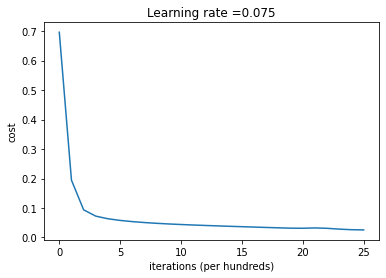

In [22]:
# GRADED CODE: binary classification
### START CODE HERE ###
# layers_dims = [30,80,25,25,35,1]

layers_dims = [30,120,55,35,1]
activation_fn = ["relu","relu","relu","sigmoid"]
learning_rate = 0.075
num_iterations = 2551
print_cost = True
classes = 2
costs = []                         # keep track of cost
model = Model(layers_dims, activation_fn)

# Loop (batch gradient descent)
for i in range(0, num_iterations):
    # forward
    AL = model.forward(X_train)

    # compute cost
    if classes == 2:
        cost = compute_BCE_cost(AL, y_train)
    else:
        cost = compute_CCE_cost(AL, y_train)
        
    # backward
    dA_prev = model.backward(AL, y_train)
    
    # update
    model.update(learning_rate)

    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
      costs.append(cost)

    # if y is not None:
    #   correct = 0
    #   for i in range(len(AL)):
    #     if (AL[:, i] == y_train[:, i]).all():
    #       correct += 1
    #   print("Accuracy: "  + str(correct/))
        

            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [23]:
# Helper function
def predict(X, y, model, classes):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    model -- trained model
    classes - number of classes, 2 for binary classification, >2 for multi-class classification
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(model.linear) # number of layers in the neural network

    if classes == 2:
      p = np.zeros((1,m))
    else:
      p = np.zeros((classes, m))
    
    # Forward propagation
    probas = model.forward(X)
    
    if classes == 2:
      # convert probas to 0/1 predictions
      for i in range(0, probas.shape[1]):
          if probas[0,i] > 0.5:
              p[0,i] = 1
          else:
              p[0,i] = 0

      #print results
      if y is not None:
        print("Accuracy: "  + str(np.sum((p == y)/m)))

    else:
      # convert probas to one hot vector predictions
      prediction = np.argmax(probas, axis=0, out=None)
    
      for i in range(len(prediction)):
          p[prediction[i], i] = 1

      #print results
      if y is not None:
        correct = 0
        for i in range(m):
          if (p[:, i] == y[:, i]).all():
            correct += 1
        print("Accuracy: "  + str(correct/m))
        
    return p

In [24]:
pred_train = predict(X_train, y_train, model, 2)

Accuracy: 0.9749999999999999


In [25]:
pred_val = predict(X_val, y_val, model, 2)
output["basic_pred_val"] = pred_val
output["basic_layers_dims"] = layers_dims
output["basic_activation_fn"] = activation_fn
basic_model_parameters = []
for basic_linear in model.linear:
  basic_model_parameters.append(basic_linear.parameters)
output["basic_model_parameters"] = basic_model_parameters

Accuracy: 0.9999999999999999


In [26]:
def iter(iter_num):
    layers_dims = [30,120,55,35,1]
    activation_fn = ["relu","relu","relu","sigmoid"]
    learning_rate = 0.075
    num_iterations = iter_num
    print_cost = True
    classes = 2
    costs = []                         # keep track of cost
    model = Model(layers_dims, activation_fn)
    

    # Loop (batch gradient descent)
    for i in range(0, num_iterations):
      # forward
      AL = model.forward(X_train)

      # compute cost
      if classes == 2:
        cost = compute_BCE_cost(AL, y_train)
      else:
        cost = compute_CCE_cost(AL, y_train)
        
      # backward
      dA_prev = model.backward(AL, y_train)
    
      # update
      model.update(learning_rate)

      if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
      print ("iter= ",i)
      pred_val = predict(X_val, y_val, model, 2)

    

In [27]:
# iter(5000)

# Advanced implementation (multi class classification)

In this section, you need to implement a multi-class classifier using the functions you had previously written. You will create a model that can classify ten handwritten digits. The MNIST handwritten digit classification problem is a standard dataset in computer vision and deep learning. We usually use convolutional deep-learning neural networks for image classification. However, using only dense layers appears to be enough to handle this simple dataset, and this is a good way to get started with image datasets. 

**Exercise**: Implement a multi-class classifier and tune hyperparameter. (15%)

**Instruction**:
*   Use the functions you had previously written.
*   Preprocess the data to match the correct input format.
*   Use mini-batch gradient descent to train the model.

**Hint**:
For data preprocessing, please be careful with the dimension of the inputs (X and y) and also note that the values of images are usually integers that fall between 0 and 255. You need to change the data type into float and scale the values between 0 and 1.

In Batch Gradient Descent, we consider all the samples for every step of Gradient Descent. But what if our dataset is huge? MNIST training data contains 60000 training samples, then to take one step, the model will have to calculate the gradients of all the 60000 samples. This does not seem an efficient way. Hence, mini-batch gradient descent is recommended to be used in this part.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28)


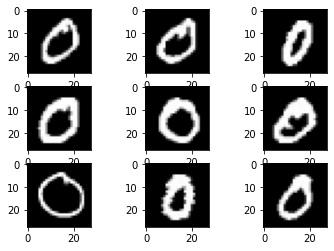

shape of X_train: (784, 60000)
shape of y_train: (10, 60000)
shape of X_test: (784, 10000)
shape of X_train: (784, 60000)
shape of y_train: (10, 60000)
shape of X_test: (784, 10000)


In [29]:
# load data
data = np.load("advanced_data.npz")
X_train = data["X_train"]
y_train = data["y_train"].reshape(-1)
X_test = data["X_test"]

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s' % (X_test.shape, ))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)
# show the figure
plt.show()

# GRADED CODE: multi-class classification (Data preprocessing)
### START CODE HERE ###
X_train = np.reshape(X_train,(60000,784))
X_test = np.reshape(X_test,(10000,784))
X_train = X_train.T
X_test = X_test.T

s = len(y_train)
tmp = np.zeros((10, s))
for i in range(s):
	tmp[int(y_train[i])][i] = 1 
y_train = tmp


### END CODE HERE ###

print("shape of X_train: " + str(X_train.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of X_test: " + str(X_test.shape))

# GRADED CODE: multi-class classification (Data preprocessing)
### START CODE HERE ###
X_train = X_train/255
X_test = X_test/255
### END CODE HERE ###

print("shape of X_train: " + str(X_train.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of X_test: " + str(X_test.shape))

In [30]:
#You can split training and validation set here. (Optional)
### START CODE HERE ###


### END CODE HERE ###

Cost after iteration 0: 0.040317
Accuracy: 0.9454
Cost after iteration 1: 0.005261
Accuracy: 0.9596
Cost after iteration 2: 0.002027
Accuracy: 0.9673
Cost after iteration 3: 0.000948
Accuracy: 0.9712
Cost after iteration 4: 0.000535
Accuracy: 0.9736
Cost after iteration 5: 0.000421
Accuracy: 0.9739
Cost after iteration 6: 0.000228
Accuracy: 0.9747
Cost after iteration 7: 0.000091
Accuracy: 0.9759
Cost after iteration 8: 0.000019
Accuracy: 0.9779
Cost after iteration 9: -0.000000
Accuracy: 0.9799
Cost after iteration 10: -0.000005
Accuracy: 0.9798
Cost after iteration 11: -0.000007
Accuracy: 0.9796
Cost after iteration 12: -0.000008
Accuracy: 0.9798
Cost after iteration 13: -0.000008
Accuracy: 0.9798
Cost after iteration 14: -0.000009
Accuracy: 0.9801
Cost after iteration 15: -0.000009
Accuracy: 0.9803
Cost after iteration 16: -0.000009
Accuracy: 0.9801
Cost after iteration 17: -0.000009
Accuracy: 0.9801
Cost after iteration 18: -0.000009
Accuracy: 0.9801
Cost after iteration 19: -0.000

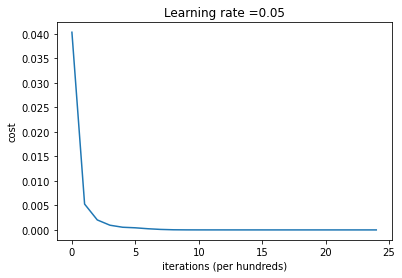

In [32]:
# GRADED CODE: multi-class classification
### START CODE HERE ###
permutation = list(np.random.permutation(60000))
shuffled_X = X_train[:,permutation]
shuffled_Y = y_train[:,permutation]
tr_x = shuffled_X[:,10000:]
va_x = shuffled_X[:,:10000]
tr_y = shuffled_Y[:,10000:]
va_y = shuffled_Y[:,:10000]

def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector, of shape (number of classes, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = X[:,mini_batch_size*k:mini_batch_size*(k+1)]
        mini_batch_Y = Y[:,mini_batch_size*k:mini_batch_size*(k+1)]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        mini_batch_X = X[:,mini_batch_size*(num_complete_minibatches):]
        mini_batch_Y = Y[:,mini_batch_size*(num_complete_minibatches):]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches



# now_best 0.9824
#layers_dims = [784,500,70,150,10]

#layers_dims = [784,2500,400,800,120,10]

#layers_dims = [784,3000,500,2000,300,10]
#0.9812. / 25

layers_dims = [784,3000,500,2000,300,10]
activation_fn = ["relu","relu","relu","relu","softmax"]

# layers_dims = [784,3000,800,150,40,10]
# activation_fn = ["relu","relu","relu","relu","softmax"]
learning_rate = 0.05
num_iterations = 25
batch_size = 64
print_cost = True
classes = 10
costs = []                         # keep track of cost
model = Model(layers_dims, activation_fn)

# Loop (gradient descent)
for i in range(0, num_iterations):
    mini_batches = random_mini_batches(tr_x, tr_y, batch_size)
    for batch in mini_batches:
        x_batch, y_batch = batch

        # forward
        AL = model.forward(x_batch)

        # compute cost
        if classes == 2:
          cost = compute_BCE_cost(AL, y_batch)
        else:
          cost = compute_CCE_cost(AL, y_batch)

        # backward
        dA_prev = model.backward(AL, y_batch)
    
        # update
        model.update(learning_rate)

    if print_cost and i % 1 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        pred_train = predict(va_x, va_y, model, 10)
        costs.append(cost)
            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [33]:
pred_train = predict(tr_x, tr_y, model, 10)

Accuracy: 1.0


In [34]:
#You can check for your validation accuracy here. (Optional)
### START CODE HERE ###
pred_train = predict(va_x, va_y, model, 10)
### END CODE HERE ###

Accuracy: 0.9803


In [35]:
pred_test = predict(X_test, None, model, 10)
output["advanced_pred_test"] = pred_test
output["advanced_layers_dims"] = layers_dims
output["advanced_activation_fn"] = activation_fn
advanced_model_parameters = []
for advanced_linear in model.linear:
  advanced_model_parameters.append(advanced_linear.parameters)
output["advanced_model_parameters"] = advanced_model_parameters

# Submit prediction

In [36]:
# sanity check
assert(list(output.keys()) == ['linear_initialize_parameters', 'linear_forward', 'linear_backward', 'linear_update_parameters', 'sigmoid', 'relu', 'softmax', 'sigmoid_backward', 'relu_backward', 'softmax_CCE_backward', 'model_initialize_parameters', 'model_forward_sigmoid', 'model_forward_relu', 'model_forward_softmax', 'model_backward_sigmoid', 'model_backward_relu', 'model_update_parameters', 'compute_BCE_cost', 'compute_CCE_cost', 'basic_pred_val', 'basic_layers_dims', 'basic_activation_fn', 'basic_model_parameters', 'advanced_pred_test', 'advanced_layers_dims', 'advanced_activation_fn', 'advanced_model_parameters'])

In [37]:
np.save("output.npy", output)

In [38]:
# sanity check
submit = np.load("output.npy", allow_pickle=True).item()
for key, value in submit.items():
  print(str(key) + "： " + str(type(value)))

linear_initialize_parameters： <class 'dict'>
linear_forward： <class 'tuple'>
linear_backward： <class 'tuple'>
linear_update_parameters： <class 'dict'>
sigmoid： <class 'tuple'>
relu： <class 'tuple'>
softmax： <class 'tuple'>
sigmoid_backward： <class 'numpy.ndarray'>
relu_backward： <class 'numpy.ndarray'>
softmax_CCE_backward： <class 'numpy.ndarray'>
model_initialize_parameters： <class 'tuple'>
model_forward_sigmoid： <class 'tuple'>
model_forward_relu： <class 'tuple'>
model_forward_softmax： <class 'tuple'>
model_backward_sigmoid： <class 'tuple'>
model_backward_relu： <class 'tuple'>
model_update_parameters： <class 'dict'>
compute_BCE_cost： <class 'numpy.float64'>
compute_CCE_cost： <class 'numpy.float64'>
basic_pred_val： <class 'numpy.ndarray'>
basic_layers_dims： <class 'list'>
basic_activation_fn： <class 'list'>
basic_model_parameters： <class 'list'>
advanced_pred_test： <class 'numpy.ndarray'>
advanced_layers_dims： <class 'list'>
advanced_activation_fn： <class 'list'>
advanced_model_parame

Expected output: <br>
<small>
linear_initialize_parameters： <class 'dict'> <br>
linear_forward： <class 'tuple'> <br>
linear_backward： <class 'tuple'> <br>
linear_update_parameters： <class 'dict'> <br>
sigmoid： <class 'tuple'> <br>
relu： <class 'tuple'> <br>
softmax： <class 'tuple'> <br>
sigmoid_backward： <class 'numpy.ndarray'> <br>
relu_backward： <class 'numpy.ndarray'> <br>
softmax_CCE_backward： <class 'numpy.ndarray'> <br>
model_initialize_parameters： <class 'tuple'> <br>
model_forward_sigmoid： <class 'tuple'> <br>
model_forward_relu： <class 'tuple'> <br>
model_forward_softmax： <class 'tuple'> <br>
model_backward_sigmoid： <class 'tuple'> <br>
model_backward_relu： <class 'tuple'> <br>
model_update_parameters： <class 'dict'> <br>
compute_BCE_cost： <class 'numpy.ndarray'> <br> 
compute_CCE_cost： <class 'numpy.ndarray'> <br>
basic_pred_val： <class 'numpy.ndarray'> <br>
basic_layers_dims： <class 'list'> <br>
basic_activation_fn： <class 'list'> <br>
basic_model_parameters： <class 'list'> <br>
advanced_pred_test： <class 'numpy.ndarray'> <br>
advanced_layers_dims： <class 'list'> <br>
advanced_activation_fn： <class 'list'> <br>
advanced_model_parameters： <class 'list'> <br>
</small>